In [19]:
# enables autoreloading modules
# means that if changes made in referenced .py files, the jupyter nb doesnt need to be restarted
# !! unfortunately: This cell needs to be reloaded when changes made to the bootstrap in bootstrap.py (still better than restarting)
%load_ext autoreload
%autoreload 2

# imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils import *
from bootstrap import Bootstrap, MonteCarlo

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Synthetic Data Example (Franke & Halim, 2007)

No Defects: $H_0: m_I = m_{II}$

The Hypothesis H0 was not rejected
c_alpha_star is 3.9478


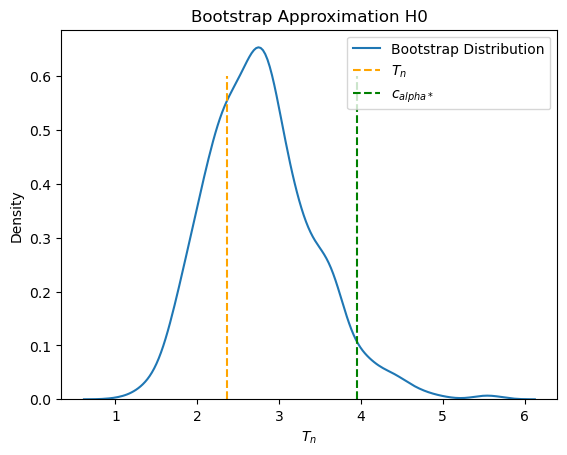

In [2]:
# Generate observational data
y1, y2 = generate_data_franke(defect=False)

BS = Bootstrap(method="wild", kernel_function="bartlett_priestley_kernel")
results_H0 =BS.compute(y1, y2, h=.02, g=.03, B=1000, alpha=.05)
BS.plot_kde(title="Bootstrap Approximation H0")

100%|██████████| 1000/1000 [00:03<00:00, 262.82it/s]


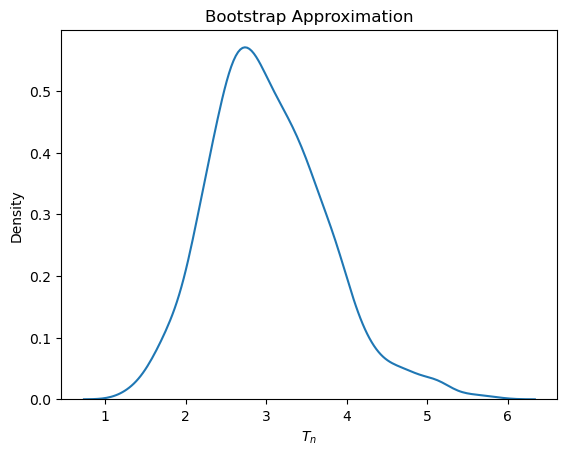

In [3]:
MC = MonteCarlo(kernel_function="bartlett_priestley_kernel")
Tn_monte = MC.compute_Tn(h=.02, M=1000)

# run & plot
fig, ax = plt.subplots()
sns.kdeplot(Tn_monte, ax=ax)
ax.set_xlabel(r"$T_n$")
ax.set_title("Bootstrap Approximation")
plt.show()

Defects: $H_1: m_I$ != $m_{II}$

The Hypothesis H0 was rejected
c_alpha_star is 4.0079


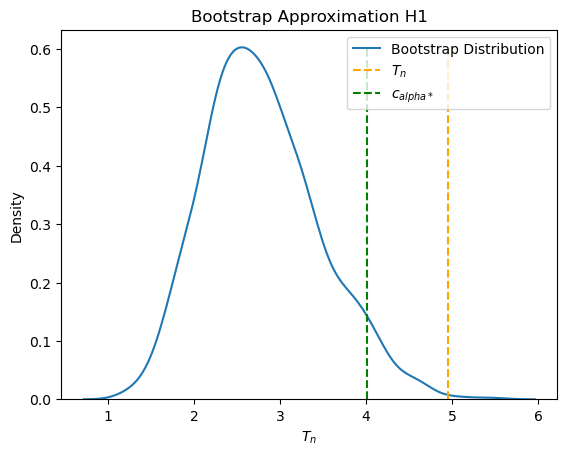

In [4]:
# Generate observational data
y1, y2 = generate_data_franke(defect=True)

BS = Bootstrap(method="wild", kernel_function="bartlett_priestley_kernel")
results_H1 = BS.compute(y1, y2, h=.02, g=.03, B=1000, alpha=.05)
BS.plot_kde(title="Bootstrap Approximation H1")

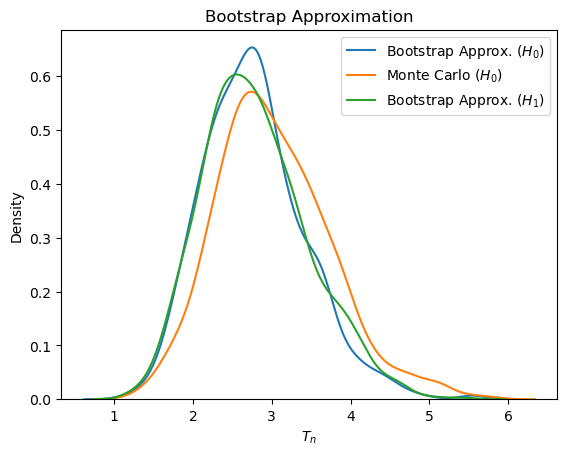

In [5]:
fig, ax = plt.subplots()
sns.kdeplot(results_H0["Tn_star"], ax=ax, label=r"Bootstrap Approx. ($H_0$)")
sns.kdeplot(Tn_monte, ax=ax, label=r"Monte Carlo ($H_0$)")
sns.kdeplot(results_H1["Tn_star"], ax=ax, label=r"Bootstrap Approx. ($H_1$)")
#ax.vlines(results_H0["Tn"], ymin=0, ymax=.6, linestyles="dashed",colors="orange", label=r"$T_n H_0$")
#ax.vlines(results_H1["Tn"], ymin=0, ymax=.6, linestyles="dashed",colors="green", label=r"$T_n H_1$")

#sns.kdeplot(Tn_monte_H1, ax=ax, label=r"Monte Carlo ($H_1$)")
ax.set_xlabel(r"$T_n$")
ax.set_title("Bootstrap Approximation")
ax.legend()
plt.show()

# Examination

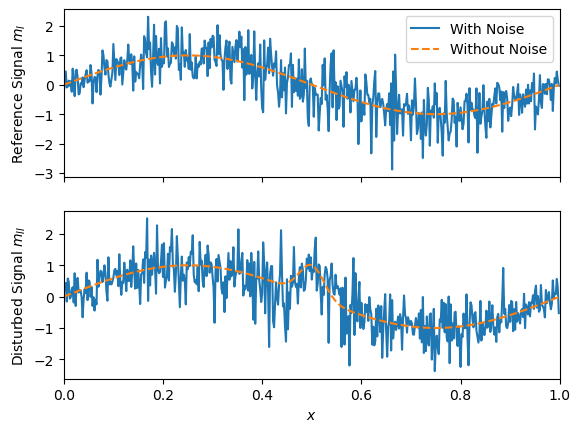

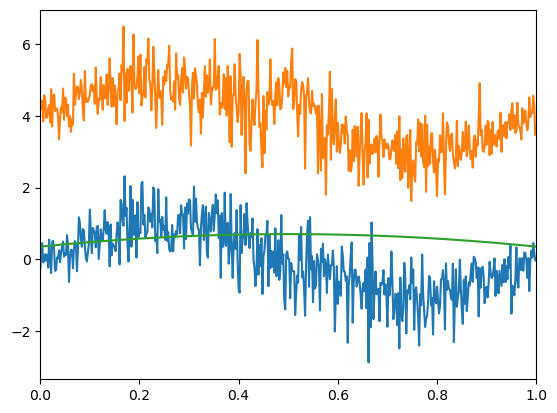

In [6]:
# plotting generated signals
N = 500
x = np.arange(N)/N
m1 = np.sin(np.pi*2*x)
m2 = np.sin(np.pi*2*x) + np.exp((-800)*np.power(x-0.5, 2))
sigma = 0.7 - 1.4*np.square(x-0.5)
y1, y2 = generate_synthetic_data(m1, m2, sigma)
y1_clean, y2_clean = generate_synthetic_data(m1, m2, 0)

#plt.figure(dpi=600)
fig, axs = plt.subplots(2,1, sharex=True)
axs[0].plot(x, y1)
axs[0].plot(x, y1_clean, "--")
axs[0].set_ylabel(r"Reference Signal $m_I$")
axs[1].plot(x, y2)
axs[1].plot(x, y2_clean, "--")
axs[1].set_ylabel(r"Disturbed Signal $m_{II}$")
axs[1].set_xlabel(r"$x$")
axs[0].legend(["With Noise", "Without Noise"])
plt.xlim([0, 1])
plt.show()

plt.plot(x, y1)
plt.plot(x, y2+4)
plt.plot(x, sigma)
plt.xlim([0, 1])
plt.show()

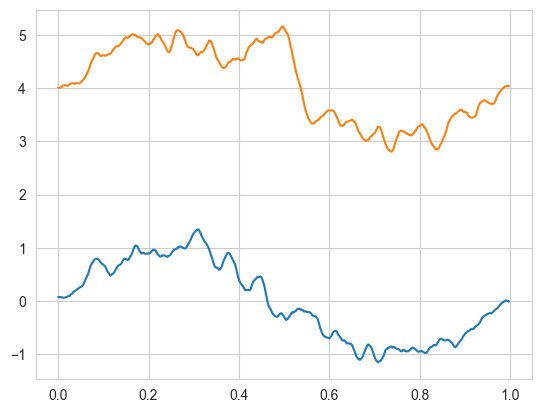

In [26]:
# plotting smoothed estimates
m1 = calc_smoothed_estimate(y1, bartlett_priestley_kernel, h=0.02)
m2 = calc_smoothed_estimate(y2, bartlett_priestley_kernel, h=0.02)
plt.plot(x, m1)
plt.plot(x, m2+4)
# plt.plot(x,np.square(m1-m2))
# np.sum(np.square(m1-m2))*np.sqrt(0.02)
plt.show()

# Test 2D Image

[ WARN:0@90603.973] global loadsave.cpp:248 findDecoder imread_('no_defect_images/example_defect_1.png'): can't open/read file: check file path/integrity
[ WARN:0@90603.974] global loadsave.cpp:248 findDecoder imread_('defect_images/example_typical_1.png'): can't open/read file: check file path/integrity


Text(0.5, 1.0, 'Image to Test')

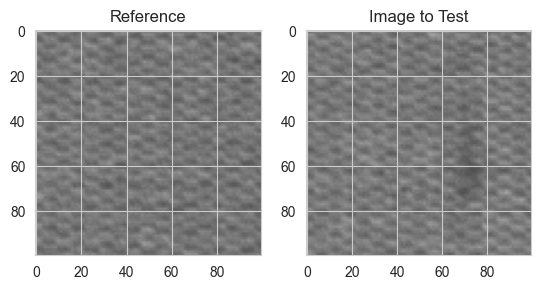

In [435]:
folders = ["no_defect_images", "defect_images"]
normal_image, defect_image = load_images(folders, filenames=['example_defect_1.png', 'example_typical_1.png'], target_size=(100, 100), detrend=False, normalize=False)

X_ref = normal_image[0]
X = defect_image[0]

fig, axs = plt.subplots(1,2)
axs[0].imshow(X_ref, cmap = 'gray', vmin=0, vmax=1)
axs[0].set_title("Reference")
axs[1].imshow(X, cmap = 'gray', vmin=0, vmax=1)
axs[1].set_title("Image to Test")


Processing Rows: 100it [00:00, 154.43it/s]
Processing Columns: 100it [00:00, 182.22it/s]


Text(0.5, 1.0, 'Image to Test')

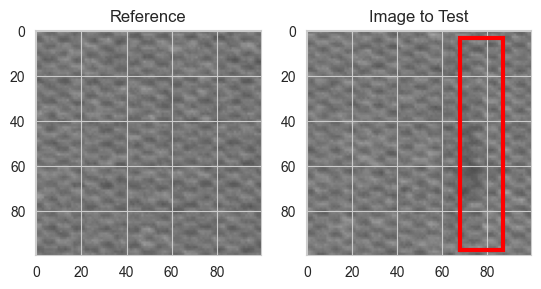

In [437]:
# h_r = 0.005 h_c = 0.01 kernel_function="gaussian_kernel"

h_r = 0.05
h_c = 0.1
factor = 10
BS = Bootstrap(method="wild", kernel_function="gaussian_kernel")
defect, minpoint, maxpoint = BS.test_image(X_ref, X, B=500, h=(h_r, h_c), g=(h_r*factor, h_c*factor))

fig, axs = plt.subplots(1,2)
axs[0].imshow(X_ref, cmap = 'gray', vmin=0, vmax=1)
axs[0].set_title("Reference")
axs[1] = plot_defect_area(X, minpoint, maxpoint, ax=axs[1])
axs[1].set_title("Image to Test")


# Old Snippets

In [ ]:
epsilon_hat = np.random.random_sample(10)
x_all = np.zeros((1000000, 10))
for i in range(1000000):
    x_all[i, :] = get_wild_residual_normal(epsilon_hat)
print(np.square(epsilon_hat))
print(np.power(epsilon_hat, 3))
print(np.mean(x_all, axis=0))
print(np.mean(np.square(x_all), axis=0))
print(np.mean(np.power(x_all, 3), axis=0))

In [ ]:
import matplotlib.pyplot as plt 
N = 500
x = np.arange(N)/N
y = np.sin(np.pi * 2* x) + np.exp((-800)*np.power(x-0.5, 2))
m = smoothed_estimate(y, bartlett_priestley_kernel, h=0.2)

plt.figure(dpi=600)
plt.plot(x, y)
plt.plot(x, m)
plt.title("Test for smoothed estimate")
plt.legend(["y", "m"])
plt.show()